## Mini_Project_01

### Sales Data의 총 판매량(QTY)을 예측하기 위한 최적 모델 찾기

1. Machine Learning 수치예측 모델을 사용하여 데이터 분석을 진행
2. Algorithms
 - Linear Regression
 - Dicision Tree Regression
 - Support Vecter Regression
 - Random Forest Regression
 - Artificial Neural Network

### Dependency
&emsp;분석에 필요한 라이브러리 불러오기

In [1]:
# Preprocess
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics

from scipy.stats import shapiro, probplot
from scipy import stats

import statsmodels.api as sm

# Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, rmsprop

# Environmnets
import math
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

Using TensorFlow backend.


### Load data

In [2]:
sales = pd.read_csv('../data/sales_건강음료.csv', encoding='euc-kr')
sales.head(10)

,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
0,200901,건강음료,37,1410,1543,4,126753,151,12
1,200902,건강음료,37,1209,1543,9,113399,3014,8
2,200903,건강음료,38,1348,1547,12,129162,1383,9
3,200904,건강음료,38,1377,1500,19,126277,3564,8
4,200905,건강음료,40,1406,1528,25,129584,9288,12
5,200906,건강음료,39,1343,1623,27,123218,9998,8
6,200907,건강음료,38,1313,1600,28,131083,17405,8
7,200908,건강음료,39,1448,1577,29,130040,7704,10
8,200909,건강음료,41,1531,1559,27,131989,4096,8
9,200910,건강음료,43,1670,1586,22,136095,2824,10


### Preprocess

In [3]:
sales["YEAR"] = sales['YM'].astype('str').str[:4].astype(int)
sales["MON"] = sales['YM'].astype('str').str[-2:].astype(int)

In [4]:
sales = sales.drop(['YM','CATEGORY'], axis=1)

#### Classfy Dataset with Year

In [13]:
s1, s2, s3, s4, s5 = divide_by_year(sales)

In [14]:
s4.head(10)

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
36,30,1701,2112,3,203133,362,11,2012,1
37,31,1607,2182,5,186880,377,8,2012,2
38,31,1578,2182,11,212945,6556,10,2012,3
39,42,1541,10944,18,209151,17042,9,2012,4
40,42,1662,10944,24,215673,2095,10,2012,5
41,45,1518,10266,28,215525,8865,10,2012,6
42,43,1554,10441,29,203590,25076,9,2012,7
43,43,1501,10462,30,228142,32385,9,2012,8
44,42,1912,10625,25,223581,23569,10,2012,9
45,44,2045,10188,21,233331,11111,10,2012,10


#### Preview Dataset & Plot

- Time-series Plot

Yearly

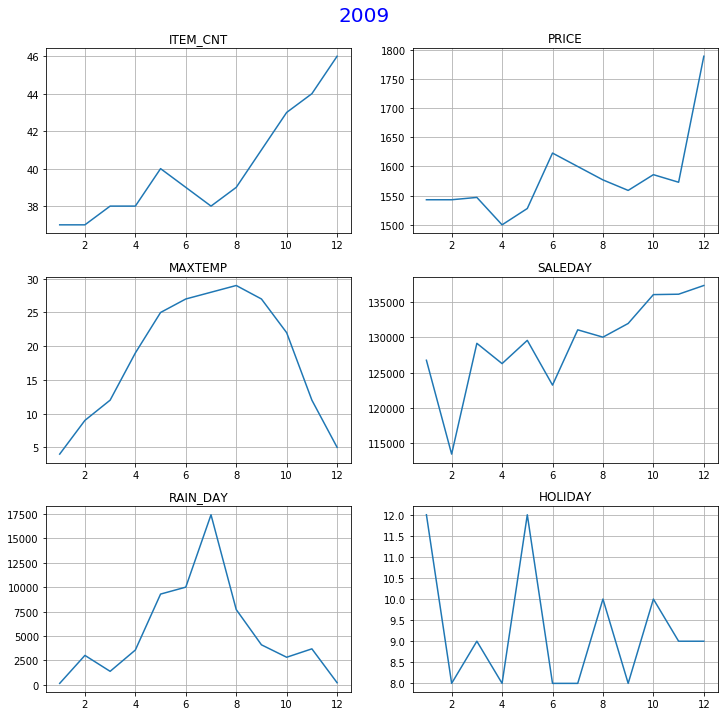

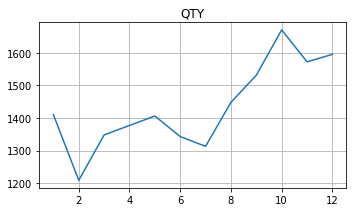

In [61]:
sales_plot(s1, type='time')

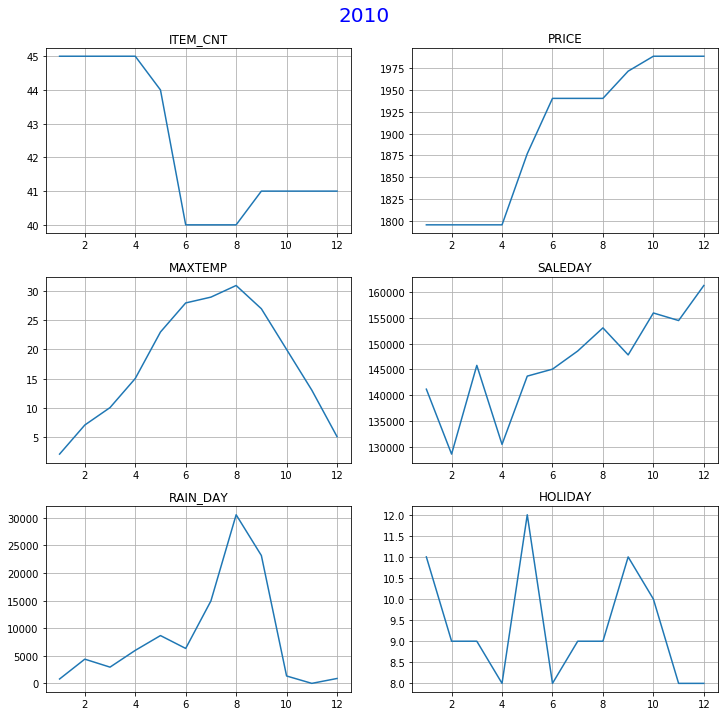

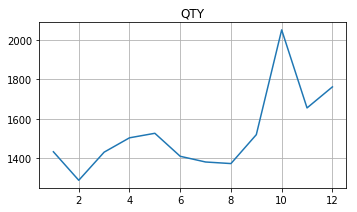

In [62]:
sales_plot(s2, type='time')

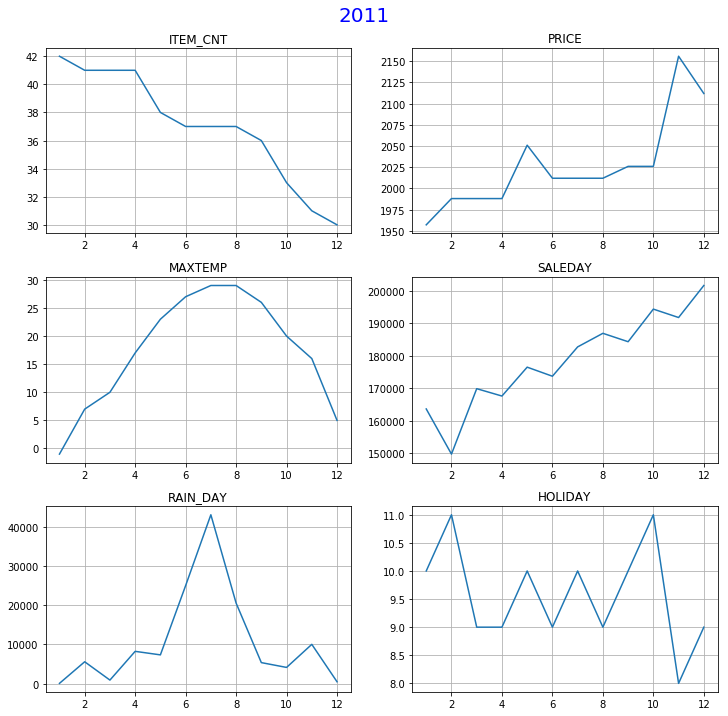

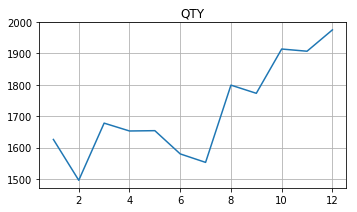

In [63]:
sales_plot(s3, type='time')

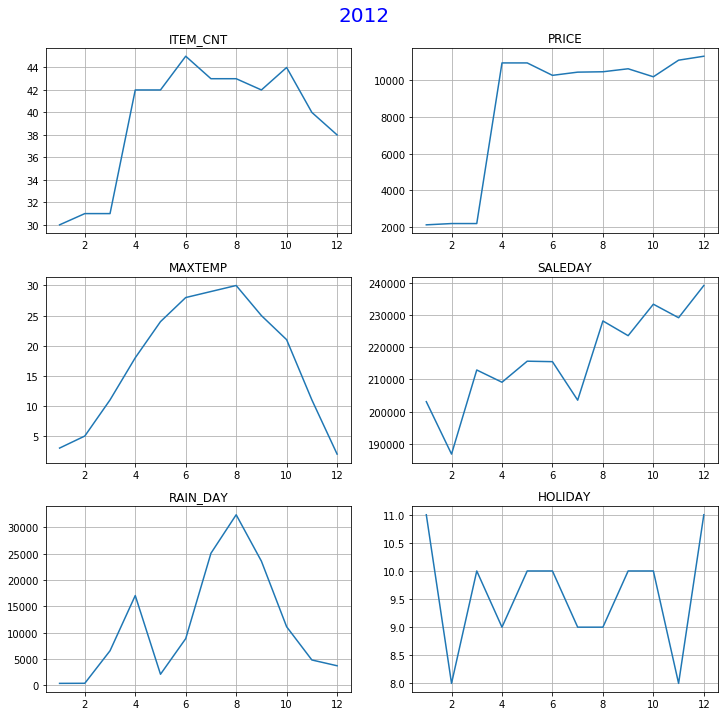

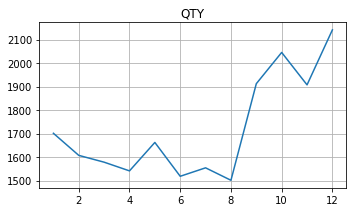

In [64]:
sales_plot(s4, type='time')

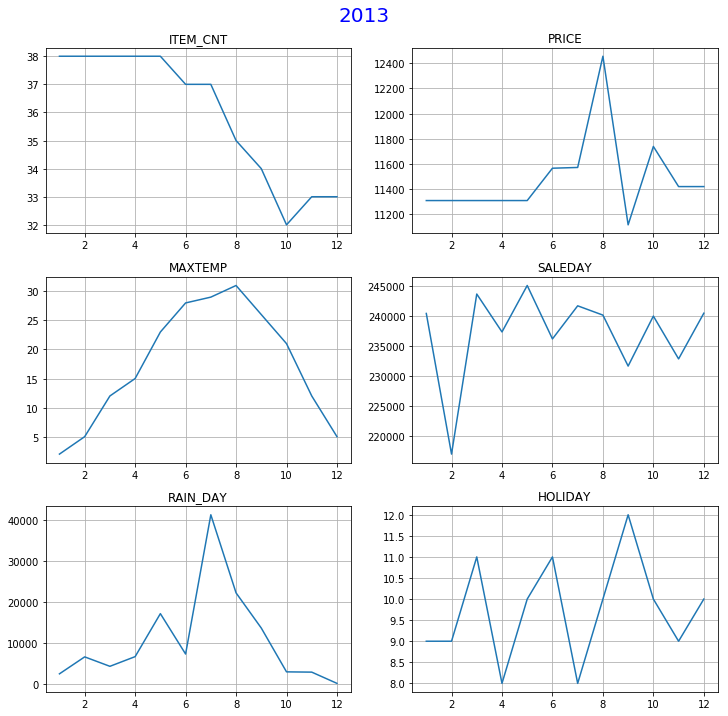

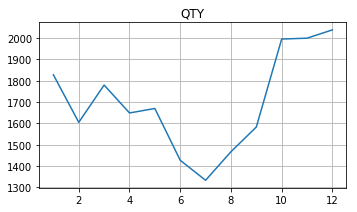

In [65]:
sales_plot(s5, type='time')

By Variable

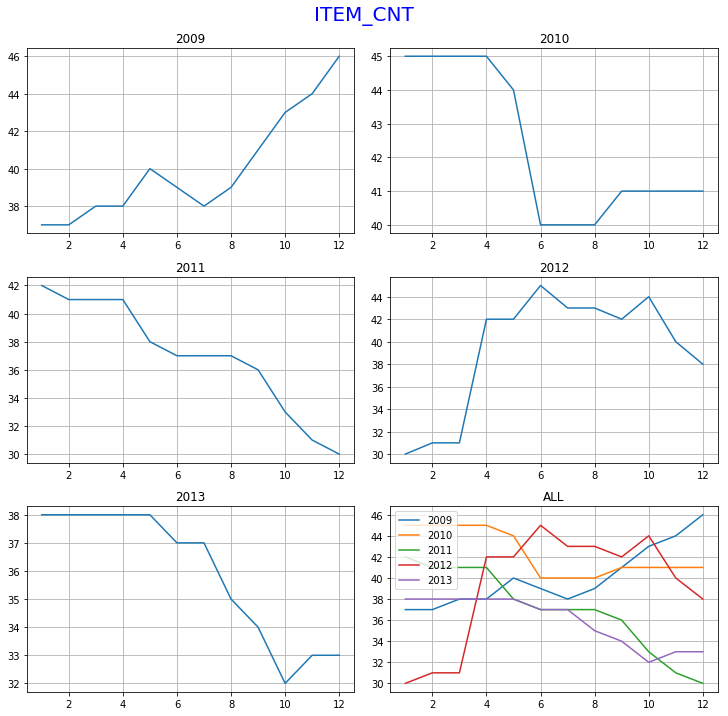

In [66]:
var_plot(sales, var_name='ITEM_CNT')

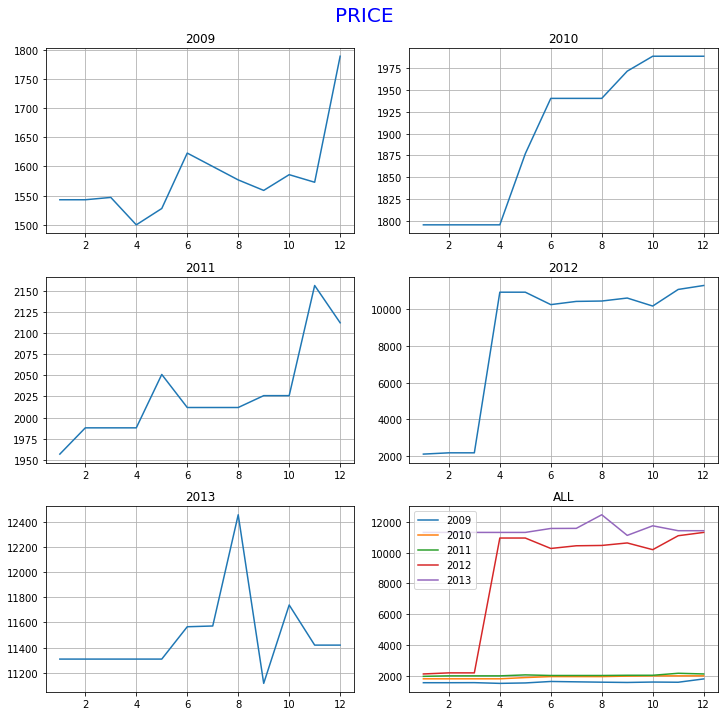

In [67]:
var_plot(sales, var_name='PRICE')

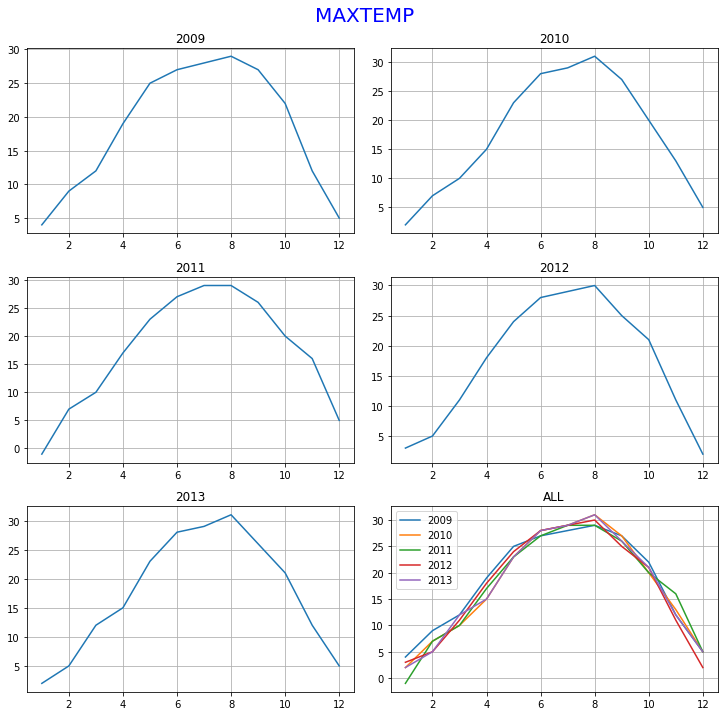

In [68]:
var_plot(sales, var_name='MAXTEMP')

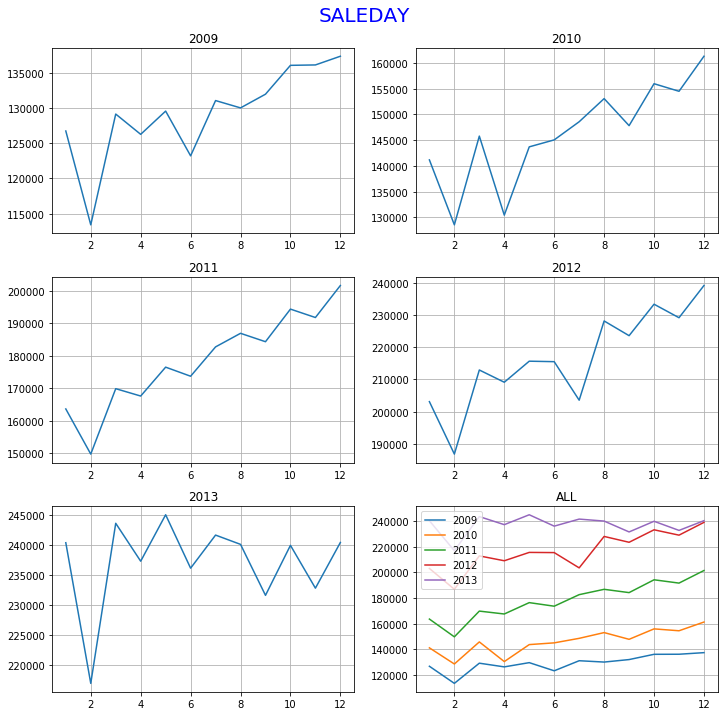

In [69]:
var_plot(sales, var_name='SALEDAY')

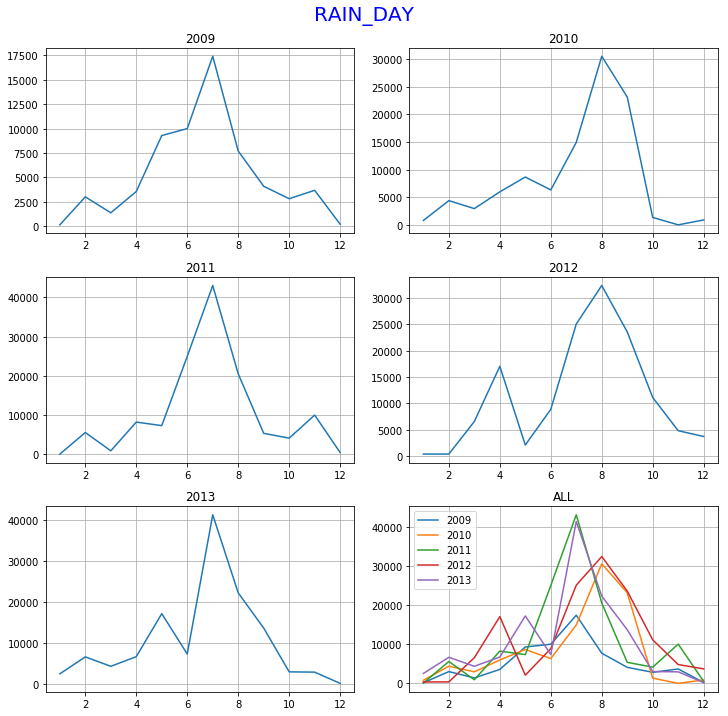

In [70]:
var_plot(sales, var_name='RAIN_DAY')

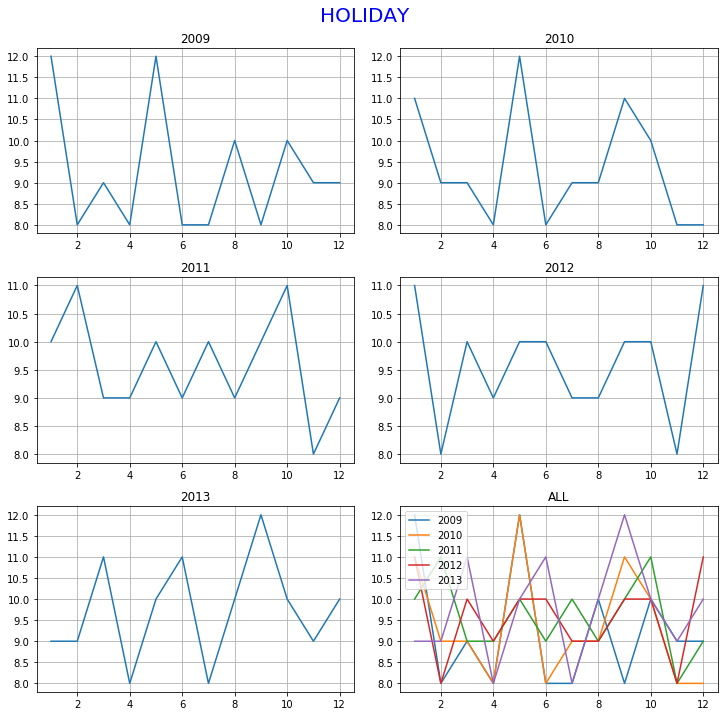

In [71]:
var_plot(sales, var_name='HOLIDAY')

- QTY Plot

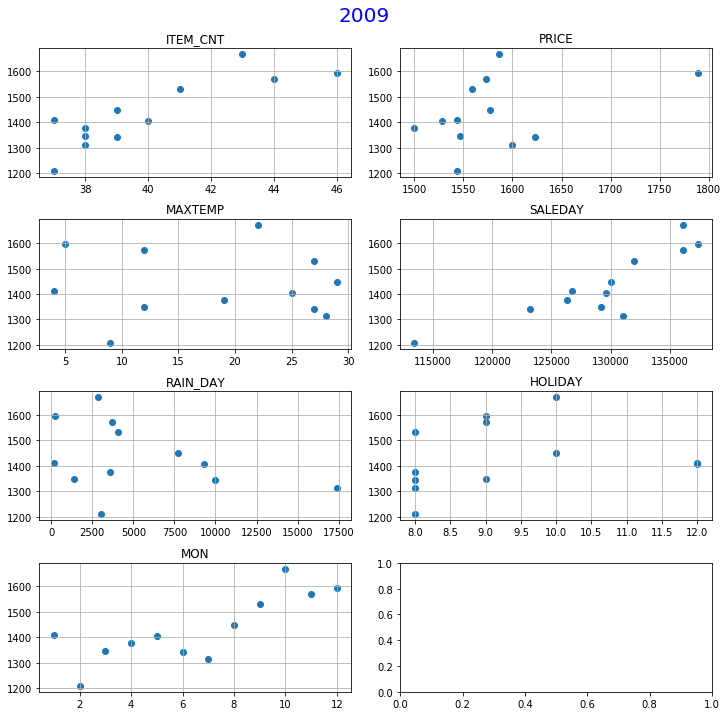

In [72]:
sales_plot(s1, type='qty')

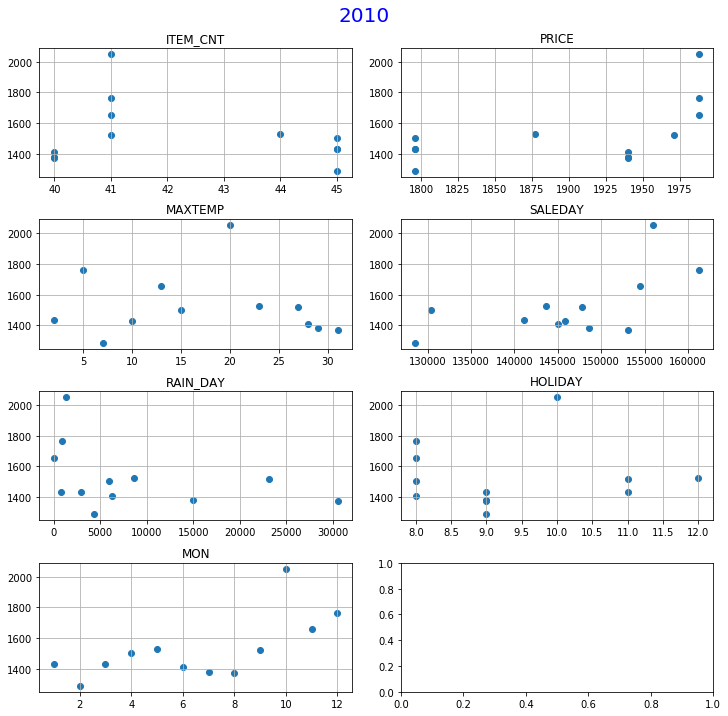

In [73]:
sales_plot(s2, type='qty')

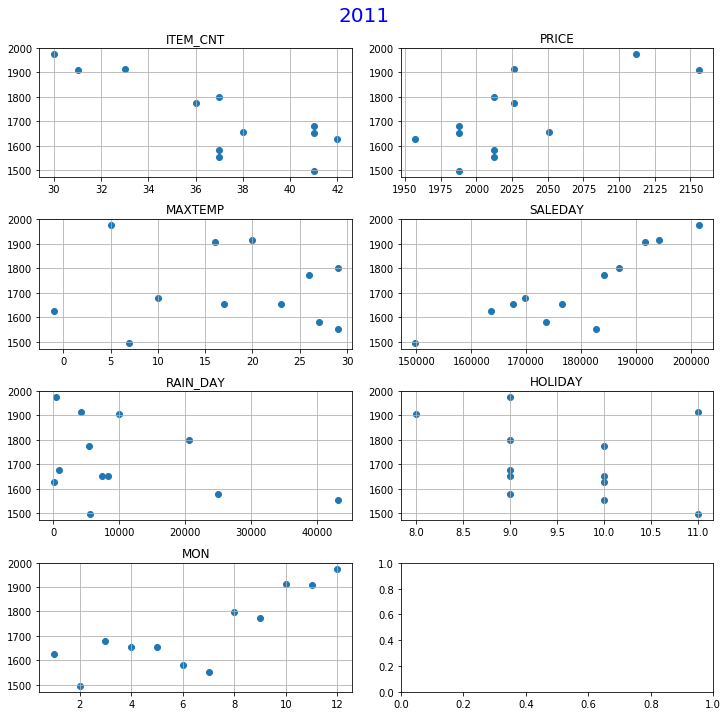

In [74]:
sales_plot(s3, type='qty')

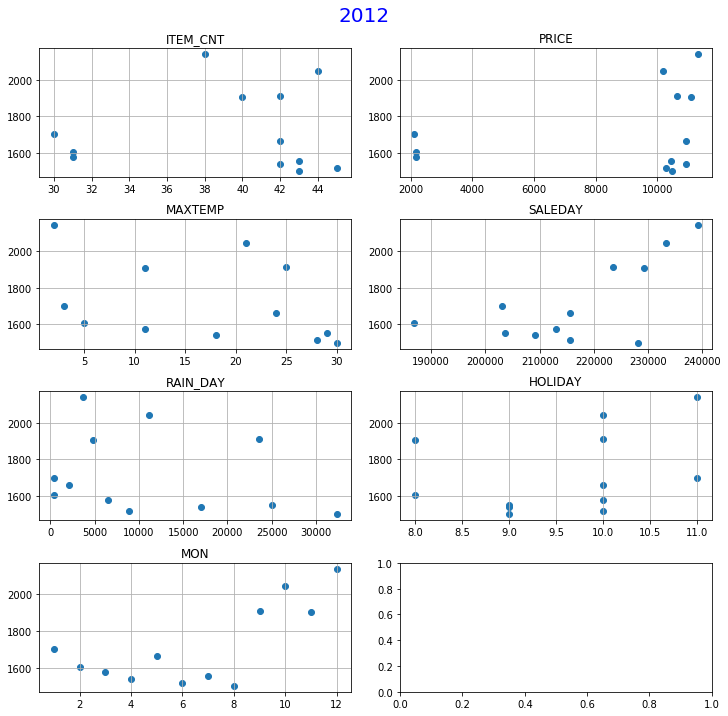

In [75]:
sales_plot(s4, type='qty')

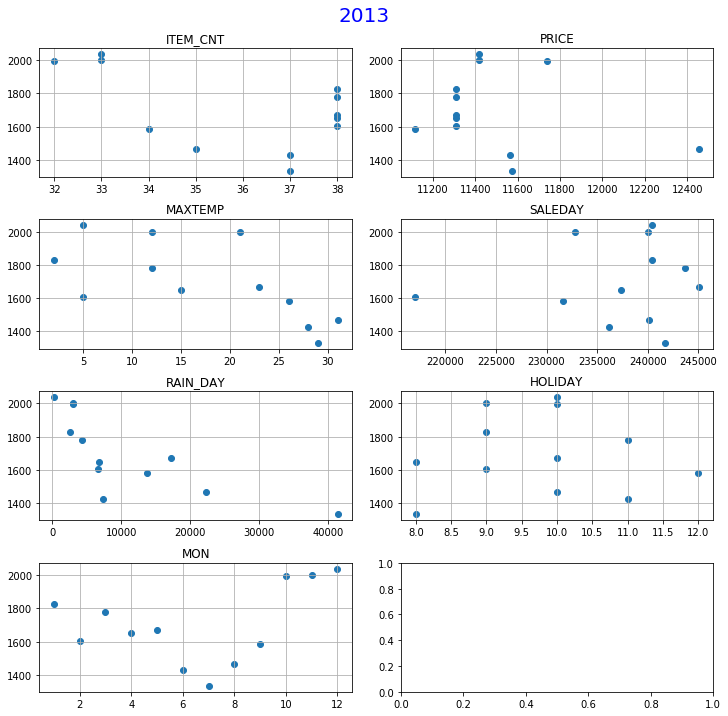

In [76]:
sales_plot(s5, type='qty')

- Correlation Analysis

In [77]:
corr = sales.corr(method = 'pearson')
corr

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
ITEM_CNT,1.000000,-0.305669,-0.102890,0.087808,-0.388875,0.040712,-0.051467,-0.385230,-0.086508
QTY,-0.305669,1.000000,0.352128,-0.258754,0.566744,-0.246630,0.138428,0.462642,0.526713
PRICE,-0.102890,0.352128,1.000000,0.091919,0.874323,0.209682,0.106751,0.842508,0.138932
MAXTEMP,0.087808,-0.258754,0.091919,1.000000,0.026153,0.674853,-0.000733,-0.028045,0.272496
SALEDAY,-0.388875,0.566744,0.874323,0.026153,1.000000,0.213520,0.150917,0.959921,0.185417
RAIN_DAY,0.040712,-0.246630,0.209682,0.674853,0.213520,1.000000,-0.051351,0.192913,0.120554
HOLIDAY,-0.051467,0.138428,0.106751,-0.000733,0.150917,-0.051351,1.000000,0.150301,-0.102624
YEAR,-0.385230,0.462642,0.842508,-0.028045,0.959921,0.192913,0.150301,1.000000,0.000000
MON,-0.086508,0.526713,0.138932,0.272496,0.185417,0.120554,-0.102624,0.000000,1.000000


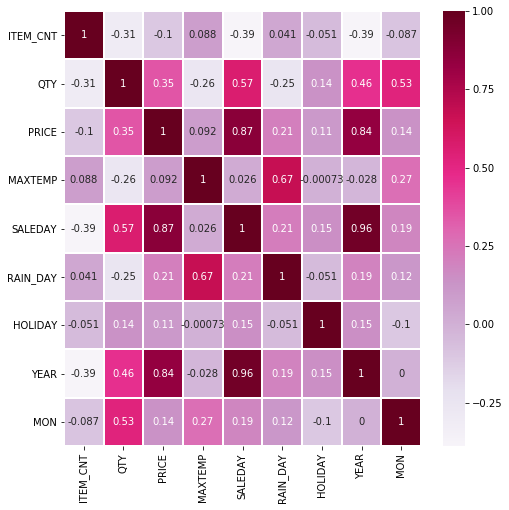

In [78]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, linewidths=1, cmap='PuRd')
plt.show()

# PuRd
# cividis
# RdPu
# OrRd
# GnBu

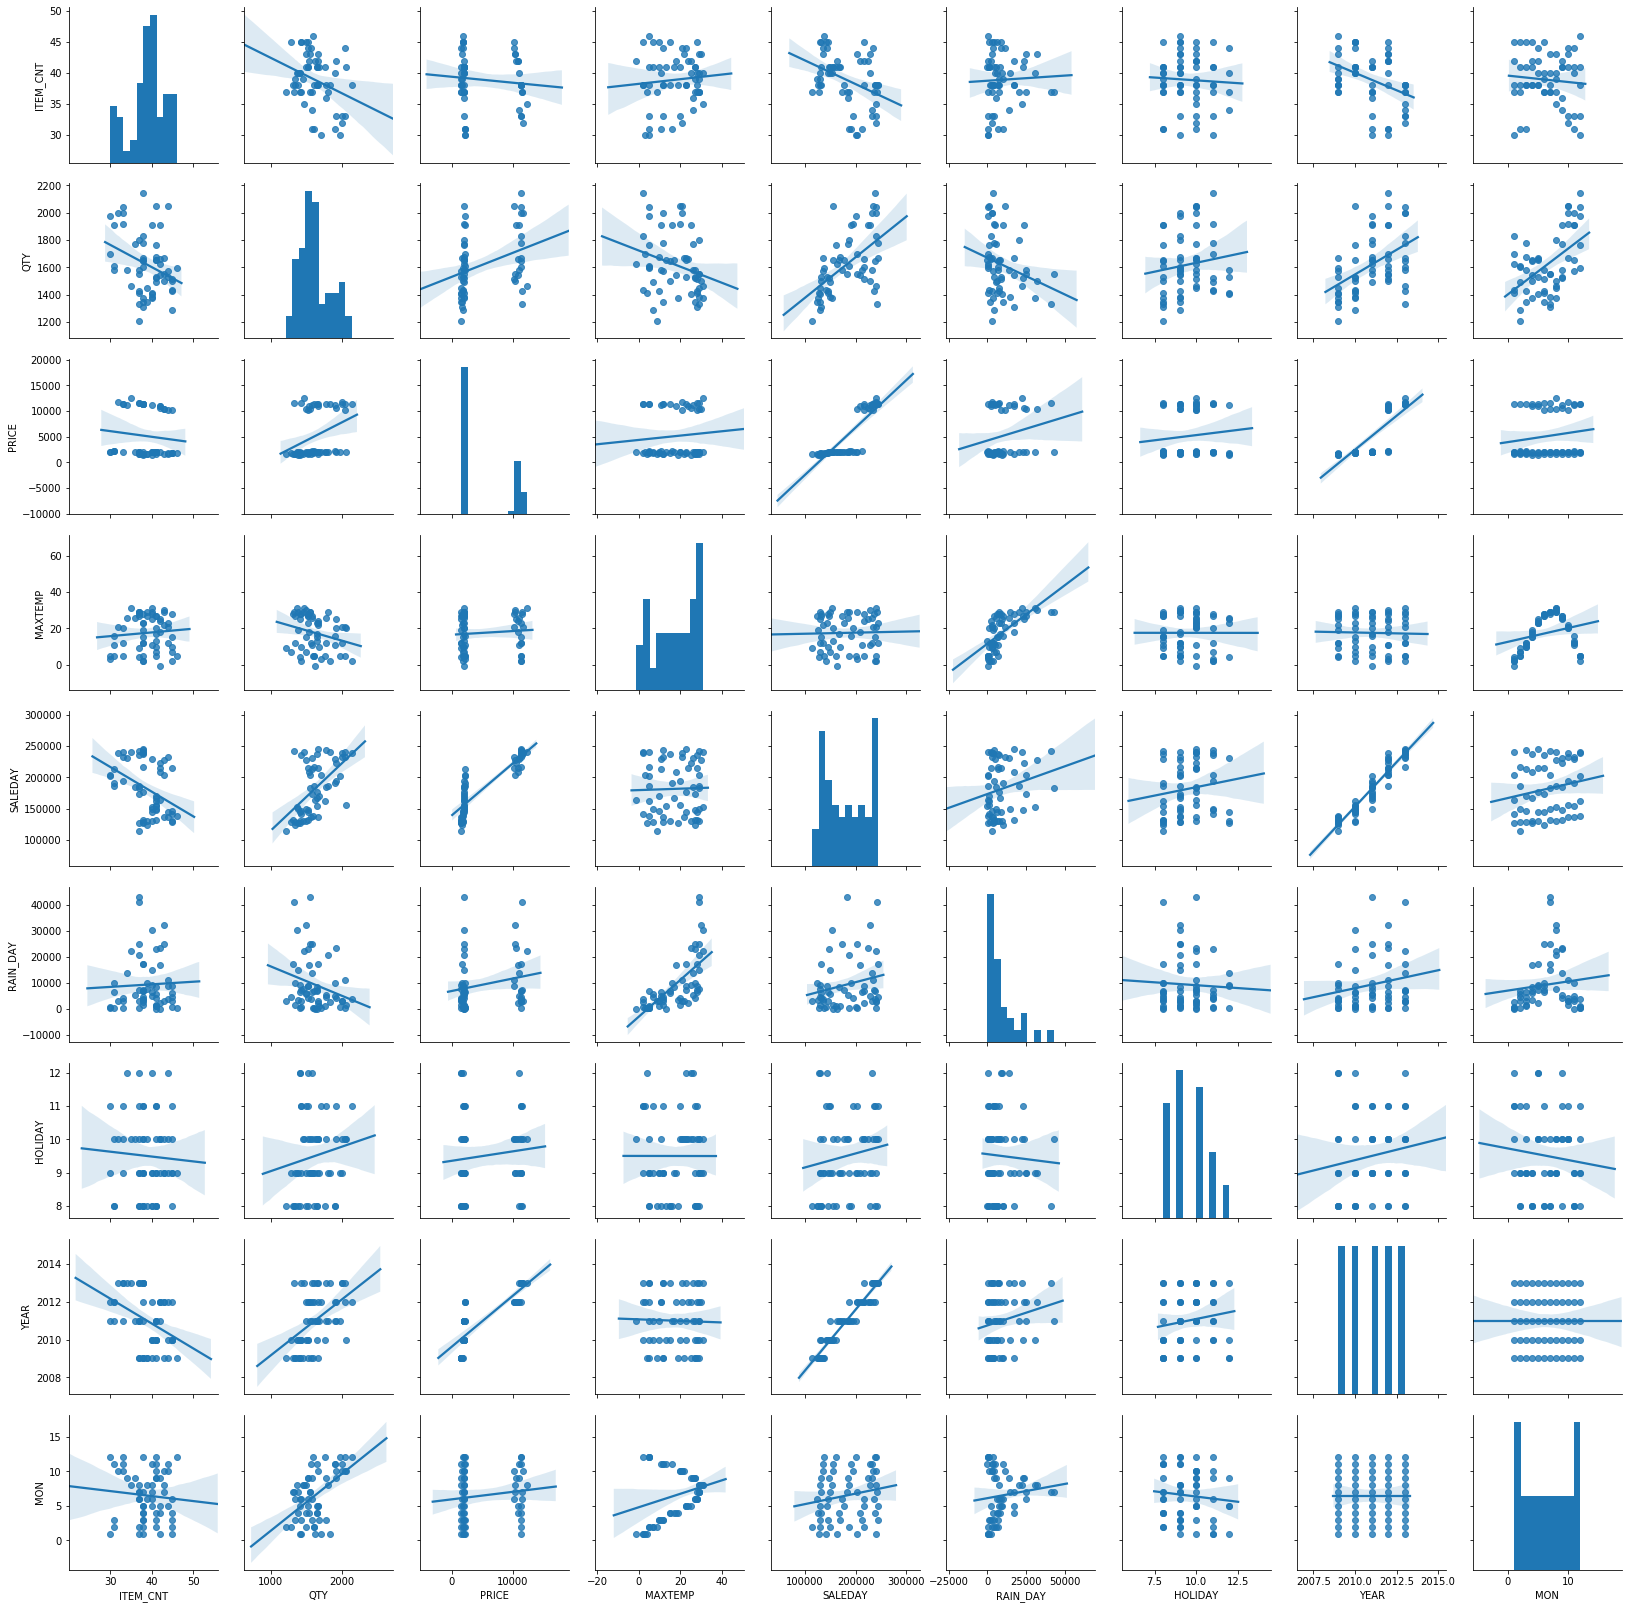

In [15]:
sns.pairplot(sales, kind='reg')

### Data Analysis

#### Normality Test

- Shapiro Test

In [79]:
weight, p_value = shapiro(sales.QTY)
print("[Weight: %.4f, P-value: %.4f]" % (weight, p_value))

[Weight: 0.9573, P-value: 0.0347]


- Plot

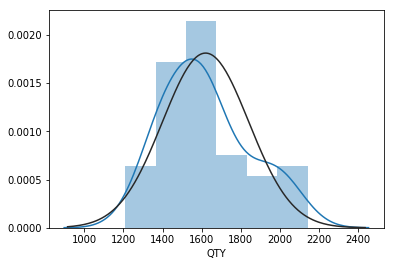

In [80]:
sns.distplot(sales.QTY, fit=stats.norm)
plt.show()

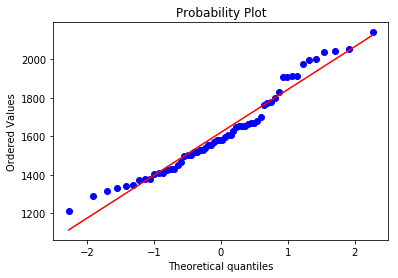

In [81]:
probplot(sales.QTY, plot=plt)
plt.show()

#### **Model 1**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY = QTY

#### Divide Dataset into train and test

In [201]:
Y = sales['QTY']

In [203]:
X = sales.drop(['QTY', 'YEAR', 'MON'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
0,37,1543,4,126753,151,12
1,37,1543,9,113399,3014,8
2,38,1547,12,129162,1383,9
3,38,1500,19,126277,3564,8
4,40,1528,25,129584,9288,12


In [204]:
X = np.array(X, dtype=np.float32)

In [205]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [206]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#### Apply Regressions

In [207]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs1 = []
for m in model_type:
    regs1.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


#### Model Evaluation

- Linear Regression summary

In [208]:
model = regs1[0][1]
y_pred = regs1[0][2]

result1 = regression_results(model, y_test, y_pred)
result1

coefficients:  8.046592 -0.04301148 1.1100549 0.008121677 -0.008405061 1.6154599
explained_variance:  0.4252
mean_squared_log_error:  0.0072
r2:  0.3722
MAE:  111.4135
MSE:  20582.342
RMSE:  143.4655


In [209]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     760.0
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           8.71e-39
Time:                        16:44:05   Log-Likelihood:                -289.75
No. Observations:                  45   AIC:                             591.5
Df Residuals:                      39   BIC:                             602.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.4573      3.800      2.489      0.017       1.772      17.143
x2            -0.0450      0.010     -4.426      0.000      -0.066      -0.024
x3             1.1832      3.286      0.360      0.721      -5.464       7.831
x4             0.0084      0.001      8.024      0.000       0.006       0.011
x5            -0.0085      0.003     -2.683      0.011      -0.015      -0.002
x6             2.8014     20.105      0.139      0.890     -37.864      43.467
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.401
Skew:                           0.153   Prob(JB):                        0.818
Kurtosis:                       3.346   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [210]:
for reg in regs1:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 143.4655 ]
[ Model: DecisionTreeRegressor     | RMSE: 220.5543 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 162.1092 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 330.6585 ]


In [211]:
table1 = view_table(regs1)
table1

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,143.4655,0.3722,-0.0987
2,DecisionTreeRegressor,220.5543,-0.4838,-1.5966
3,SVR,181.0748,-0.0001,-0.7502
4,RandomForestRegressor,162.1092,0.1984,-0.4028
5,ArtificialNeuralNetwork,330.6585,-2.3350,-4.8362


#### **Model 2**
 - Structure: ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + **MON** = QTY

In [212]:
X = sales.drop(['QTY', 'YEAR'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,1543,4,126753,151,12,1
1,37,1543,9,113399,3014,8,2
2,38,1547,12,129162,1383,9,3
3,38,1500,19,126277,3564,8,4
4,40,1528,25,129584,9288,12,5


In [213]:
X = np.array(X, dtype=np.float32)

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [215]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [216]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs2 = []
for m in model_type:
    regs2.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_58 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_59 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 17        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________


- Linear Regression summary

In [217]:
model = regs2[0][1]
y_pred = regs2[0][2]

result2 = regression_results(model, y_test, y_pred)
result2

coefficients:  6.6334195 -0.033113055 -4.3268576 0.0062684077 -0.0060614287 12.357714 33.25275
explained_variance:  0.7787
mean_squared_log_error:  0.0035
r2:  0.7153
MAE:  71.2882
MSE:  9334.288
RMSE:  96.6141


In [218]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1221.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.11e-42
Time:                        16:44:11   Log-Likelihood:                -275.13
No. Observations:                  45   AIC:                             564.3
Df Residuals:                      38   BIC:                             576.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.3421      2.782      3.359      0.002       3.711      14.973
x2            -0.0369      0.008     -4.884      0.000      -0.052      -0.022
x3            -4.1608      2.571     -1.618      0.114      -9.365       1.043
x4             0.0068      0.001      8.369      0.000       0.005       0.008
x5            -0.0063      0.002     -2.671      0.011      -0.011      -0.002
x6            14.5772     14.852      0.981      0.333     -15.490      44.644
x7            33.0930      5.612      5.897      0.000      21.733      44.453
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.288
Skew:                          -0.232   Prob(JB):                        0.525
Kurtosis:                       3.687   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [219]:
for reg in regs2:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 96.6141 ]
[ Model: DecisionTreeRegressor     | RMSE: 127.7573 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 53.3110 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 204.4915 ]


In [220]:
table2 = view_table(regs2)
table2

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,96.6141,0.7153,0.4306
2,DecisionTreeRegressor,127.7573,0.5021,0.0043
3,SVR,181.0748,-0.0001,-1.0002
4,RandomForestRegressor,53.3110,0.9133,0.8266
5,ArtificialNeuralNetwork,204.4915,-0.2755,-1.5510


#### **Model 3**
 - Structure: ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + MON = QTY (**-PRICE**)

In [221]:
X = sales.drop(['QTY', 'YEAR', 'PRICE'], axis=1)
X.head()

,ITEM_CNT,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,4,126753,151,12,1
1,37,9,113399,3014,8,2
2,38,12,129162,1383,9,3
3,38,19,126277,3564,8,4
4,40,25,129584,9288,12,5


In [222]:
X = np.array(X, dtype=np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [223]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs3 = []
for m in model_type:
    regs3.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_62 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_63 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_64 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


- Linear Regression summary

In [224]:
model = regs3[0][1]
y_pred = regs3[0][2]

result3 = regression_results(model, y_test, y_pred)
result3

coefficients:  -2.175356 -5.2826533 0.0026260528 -0.0048920815 20.505442 36.398235
explained_variance:  0.731
mean_squared_log_error:  0.0041
r2:  0.6901
MAE:  78.7956
MSE:  10161.216
RMSE:  100.8029


In [225]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     895.4
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           3.66e-40
Time:                        16:44:19   Log-Likelihood:                -286.09
No. Observations:                  45   AIC:                             584.2
Df Residuals:                      39   BIC:                             595.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.4064      3.462      3.295      0.002       4.404      18.409
x2            -4.8347      3.233     -1.496      0.143     -11.374       1.704
x3             0.0035      0.001      6.179      0.000       0.002       0.005
x4            -0.0057      0.003     -1.909      0.064      -0.012       0.000
x5            45.8948     16.870      2.720      0.010      11.771      80.018
x6            38.0350      6.951      5.472      0.000      23.976      52.094
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.724
Skew:                          -0.420   Prob(JB):                        0.422
Kurtosis:                       3.464   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Compare Regressions

In [226]:
for reg in regs3:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 100.8029 ]
[ Model: DecisionTreeRegressor     | RMSE: 131.4040 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 105.2482 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 322.9863 ]


In [227]:
table3 = view_table(regs3)
table3

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,100.8029,0.6901,0.4576
2,DecisionTreeRegressor,131.4040,0.4733,0.0783
3,SVR,181.0748,-0.0001,-0.7502
4,RandomForestRegressor,105.2482,0.6621,0.4087
5,ArtificialNeuralNetwork,322.9863,-2.1820,-4.5685


#### BIC Analysis

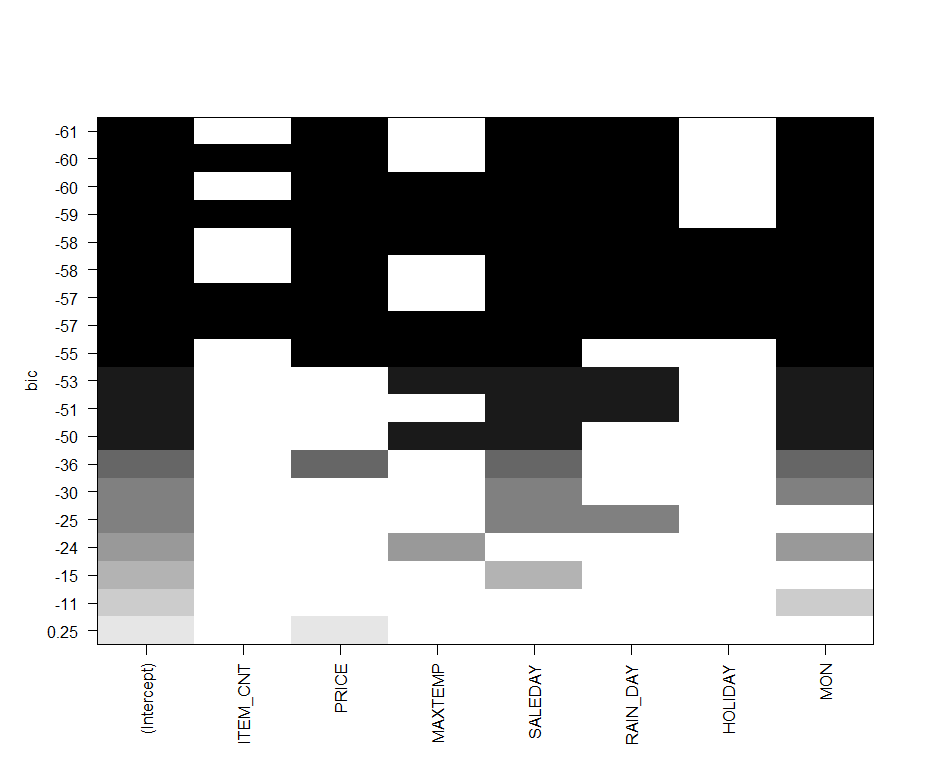

In [228]:
Image('BIC_variable_select.png', width=700, height=700)

#### **Model 4**
 - Structure: **PRICE** + SALEDAY + RAIN_DAY + MON = QTY (-**ITEM_CNT, MAXTEMP, HOLIDAY**)

In [229]:
X = sales.drop(['ITEM_CNT', 'MAXTEMP', 'QTY', 'HOLIDAY', 'YEAR'], axis=1)
X.head()

,PRICE,SALEDAY,RAIN_DAY,MON
0,1543,126753,151,1
1,1543,113399,3014,2
2,1547,129162,1383,3
3,1500,126277,3564,4
4,1528,129584,9288,5


In [230]:
X = np.array(X, dtype=np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [231]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs4 = []
for m in model_type:
    regs4.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\709-000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_69 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 17        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [232]:
model = regs4[0][1]
y_pred = regs4[0][2]

result4 = regression_results(model, y_test, y_pred)
result4

coefficients:  -0.029478272 0.005816758 -0.0084268125 29.76666
explained_variance:  0.7555
mean_squared_log_error:  0.0043
r2:  0.6574
MAE:  81.1243
MSE:  11233.171
RMSE:  105.9866


In [233]:
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1337.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           7.84e-43
Time:                        16:44:29   Log-Likelihood:                -287.30
No. Observations:                  45   AIC:                             582.6
Df Residuals:                      41   BIC:                             589.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0611      0.007     -9.094      0.000      -0.075      -0.048
x2             0.0101      0.000     27.516      0.000       0.009       0.011
x3            -0.0085      0.002     -3.846      0.000      -0.013      -0.004
x4            29.0664      6.591      4.410      0.000      15.756      42.377
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.183
Skew:                          -0.388   Prob(JB):                        0.553
Kurtosis:                       2.832   Cond. No.                     5.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
for reg in regs4:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 105.9867 ]
[ Model: DecisionTreeRegressor     | RMSE: 122.8376 ]
[ Model: SVR                       | RMSE: 181.0748 ]
[ Model: RandomForestRegressor     | RMSE: 126.2652 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 305.7147 ]


In [235]:
table4 = view_table(regs4)
table4

,Regression,RMSE,R2,Adj_R2
1,LinearRegression,105.9867,0.6574,0.5203
2,DecisionTreeRegressor,122.8376,0.5397,0.3556
3,SVR,181.0748,-0.0001,-0.4002
4,RandomForestRegressor,126.2652,0.5137,0.3192
5,ArtificialNeuralNetwork,305.7147,-1.8508,-2.9911


### Compare Models

In [236]:
tables = table1.merge(table2, on='Regression').merge(table3, on='Regression').merge(table4, on='Regression')
tables = tables.set_index('Regression', drop=True)
tables.columns = ['RMSE_'+str(n) if i % 3 == 0 else ('R2_'+str(n) if i % 3 == 1 else 'Adj_R2_'+str(n)) for i, n in enumerate(np.repeat(range(1, 5), 3))]

In [237]:
tables

,RMSE_1,R2_1,Adj_R2_1,RMSE_2,R2_2,Adj_R2_2,RMSE_3,R2_3,Adj_R2_3,RMSE_4,R2_4,Adj_R2_4
Regression,,,,,,,,,,,,
LinearRegression,143.4655,0.3722,-0.0987,96.6141,0.7153,0.4306,100.8029,0.6901,0.4576,105.9867,0.6574,0.5203
DecisionTreeRegressor,220.5543,-0.4838,-1.5966,127.7573,0.5021,0.0043,131.4040,0.4733,0.0783,122.8376,0.5397,0.3556
SVR,181.0748,-0.0001,-0.7502,181.0748,-0.0001,-1.0002,181.0748,-0.0001,-0.7502,181.0748,-0.0001,-0.4002
RandomForestRegressor,162.1092,0.1984,-0.4028,53.3110,0.9133,0.8266,105.2482,0.6621,0.4087,126.2652,0.5137,0.3192
ArtificialNeuralNetwork,330.6585,-2.3350,-4.8362,204.4915,-0.2755,-1.5510,322.9863,-2.1820,-4.5685,305.7147,-1.8508,-2.9911


In [238]:
rmset = tables.iloc[:,::3]
r2t = tables.iloc[:,1::3]
adjt = tables.iloc[:,2::3]

In [239]:
rmset

,RMSE_1,RMSE_2,RMSE_3,RMSE_4
Regression,,,,
LinearRegression,143.4655,96.6141,100.8029,105.9867
DecisionTreeRegressor,220.5543,127.7573,131.4040,122.8376
SVR,181.0748,181.0748,181.0748,181.0748
RandomForestRegressor,162.1092,53.3110,105.2482,126.2652
ArtificialNeuralNetwork,330.6585,204.4915,322.9863,305.7147


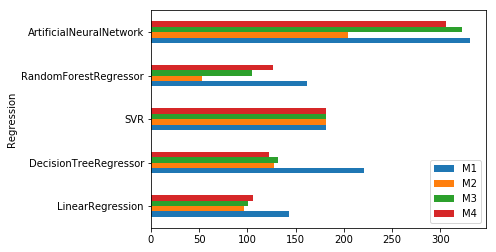

In [241]:
table_plot(tables, score='RMSE')

In [242]:
r2t

,R2_1,R2_2,R2_3,R2_4
Regression,,,,
LinearRegression,0.3722,0.7153,0.6901,0.6574
DecisionTreeRegressor,-0.4838,0.5021,0.4733,0.5397
SVR,-0.0001,-0.0001,-0.0001,-0.0001
RandomForestRegressor,0.1984,0.9133,0.6621,0.5137
ArtificialNeuralNetwork,-2.3350,-0.2755,-2.1820,-1.8508


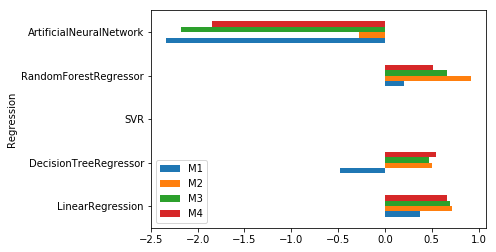

In [243]:
table_plot(tables, score='R2')

In [244]:
adjt

,Adj_R2_1,Adj_R2_2,Adj_R2_3,Adj_R2_4
Regression,,,,
LinearRegression,-0.0987,0.4306,0.4576,0.5203
DecisionTreeRegressor,-1.5966,0.0043,0.0783,0.3556
SVR,-0.7502,-1.0002,-0.7502,-0.4002
RandomForestRegressor,-0.4028,0.8266,0.4087,0.3192
ArtificialNeuralNetwork,-4.8362,-1.5510,-4.5685,-2.9911


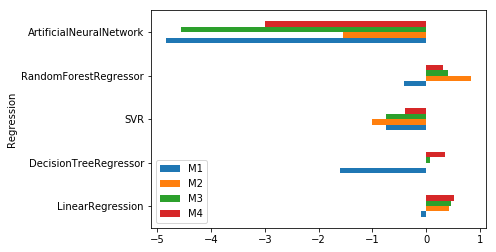

In [245]:
table_plot(tables, score='Adj_R2')

### Environments

In [6]:
def divide_by_year(s):
    
    s1 = s[s.YEAR==2009]
    s2 = s[s.YEAR==2010]
    s3 = s[s.YEAR==2011]
    s4 = s[s.YEAR==2012]
    s5 = s[s.YEAR==2013]
    
    return s1, s2, s3, s4 ,s5

In [7]:
def sales_plot(s, type='time'):
                
    if type == 'time':
        X = s.MON
        Y = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY']
        fig, ax = plt.subplots(3, 2, constrained_layout=True, )
        fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
        fig.set_figheight(10)
        fig.set_figwidth(10)

        idx = 0
        for row in range(3):
            for col in range(2):
                ax[row,col].plot(X, eval(Y[idx]))
                ax[row,col].set_title(Y[idx][2:])
                ax[row,col].grid(True)
                idx += 1

        plt.figure(figsize=(5.5, 14))
        plt.subplot(414)
        plt.plot(s.MON, s.QTY)
        plt.title("QTY")
        plt.grid(True)
        
    elif type == 'qty':
        X = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY', 's.MON']
        Y = s.QTY
        fig, ax = plt.subplots(4, 2, constrained_layout=True, )
        fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
        fig.set_figheight(10)
        fig.set_figwidth(10)

        idx = 0
        for row in range(4):
            for col in range(2):
                if idx < 7:
                    ax[row,col].scatter(eval(X[idx]), Y)
                    ax[row,col].set_title(X[idx][2:])
                    ax[row,col].grid(True)
                    idx += 1
                    
    else:
        print("You got a wrong type of plot")

In [8]:
def var_plot(s, var_name='ITEM_CNT'):
    
    s_div = divide_by_year(s)
    
    X = range(1, 13)    
    Y = [s_div[i].loc[:, var_name] for i in range(len(s_div))]
    title = s.YEAR.unique()
    
    fig, ax = plt.subplots(3, 2, constrained_layout=True, )
    fig.suptitle(var_name, fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)

    idx = 0
    for row in range(3):
        for col in range(2):
            if idx < 5:
                ax[row,col].plot(X, Y[idx])
                ax[row,col].set_title(title[idx])
                ax[row,col].grid(True)
            else:
                for i in range(len(Y)):
                    ax[row,col].plot(X, Y[i], label=title[i])
                ax[row,col].set_title("ALL")
                ax[row,col].legend(loc=2)
                ax[row,col].grid(True)
            idx += 1

In [9]:
def regression_results(model, y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error= metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('coefficients: ', *model.coef_)
    print('explained_variance: ', round(explained_variance, 4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error, 4))
    print('r2: ', round(r2, 4))
    print('MAE: ', round(mean_absolute_error, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

In [10]:
def view_table(regs):
    
    models = []
    rmse = []
    r2score = []
    adj_r2 = []
    
    for reg in regs:
        models.append(reg[0])
        rmse.append(reg[3])
        r2score.append(reg[4])
        adj_r2.append(reg[5])
    
    table = pd.DataFrame(zip(models, rmse, r2score, adj_r2), 
                         columns=['Regression', 'RMSE', 'R2', 'Adj_R2'], 
                         index=range(1, 6))
    
    table['RMSE'] = table['RMSE'].round(4)
    table['R2'] = table['R2'].round(4)
    table['Adj_R2'] = table['Adj_R2'].round(4)
    
    return table

In [11]:
def table_plot(tables, score='RMSE'):
    
    columns = ['M1', 'M2', 'M3', 'M4']
    
    if score == 'RMSE':
        t = tables.iloc[:,::3]
        t.columns = columns
        t.plot(kind='barh')
        
    elif score == 'R2':
        t = tables.iloc[:,1::3]
        t.columns = columns
        t.plot(kind='barh')
        
    elif score == 'Adj_R2':
        t = tables.iloc[:,2::3]
        t.columns = columns
        t.plot(kind='barh')
        
    else:
        print("Wrong score type!")

In [12]:
def apply_regs(x, y, x_test, y_test, model='lm'):
    
    """
        :Params: 
            X_train, Y_train, X_test, Y_test, model='model_type'
            
            @:model type:
                'lm'  :  LinearRegression
                'dt'  :  DecisionTreeRegressor
                'svm' :  SVR, SupportVectorRegressor
                'rf'  :  RandomForestRegressor  
                'ann' :  ArtificialNeuralNetwork
                
        :Returns:
            Full_model_name, Model, Predictions, RMSE-value, R2-score, Adj_R2-score
    """
    
    if model == 'ann':
        
        m = Sequential()
        
        m.add(Dense(64, input_shape=x_train.shape[1:], activation='relu'))
        m.add(Dense(64, activation='relu'))
        m.add(Dense(32, activation='relu'))
        m.add(Dense(16, activation='relu'))
        m.add(Dense(1))
        m.summary()

        m.compile(loss='mean_squared_error', 
                  optimizer=rmsprop(lr=0.0001, decay=0.0001), 
                  metrics=['accuracy'])
        
        m.fit(x, y, epochs=2000, verbose=0)
        m_name = 'ArtificialNeuralNetwork'
        
    else:
        
        try:
            if model == 'lm':
                m = LinearRegression()
            if model =='dt':
                m = DecisionTreeRegressor()
            if model =='svm':
                m = SVR()
            if model =='rf':
                m = RandomForestRegressor()
            
            m.fit(x, y)
            m_id = m.__str__()
            m_name = m_id[:m_id.find('(')]
    
        except:
            raise ExceptionError("ML model is not correct!, plz confirm the type of model")
        
    predictions = m.predict(x_test)
    rmse = math.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    n, p = len(x_test), len(x_test[0])
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        
    return m_name, m, predictions, rmse, r2, adj_r2